# Car Price Prediction

# 1st method

# **Part-1 **


# Imports

In [664]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None  # default='warn'

* Upload Train, test data

In [832]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test (1).csv


In [665]:
pd.set_option('display.max_rows',8)
train_df=pd.read_csv('train.csv')
train_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


# Cleaning Train Data 

## Removing Duplicates

In [666]:
train_df.drop_duplicates(inplace=True)
train_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


## Removing outliers based on price

In [667]:
train_df[['Price']].describe()

,Price
count,1.892400e+04
mean,1.858744e+04
std,1.921356e+05
min,1.000000e+00
25%,5.331000e+03
50%,1.317200e+04
75%,2.206300e+04
max,2.630750e+07


In [668]:
Q1=train_df['Price'].quantile(0.25)
Q3=train_df['Price'].quantile(0.75)
IQR=Q3-Q1
min_price=Q1-1.5*IQR
max_price=Q3+1.5*IQR
train_df=train_df[((train_df['Price']>min_price) & (train_df['Price']<max_price))]
train_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


## Removing outliers based on Prod. year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5efd660c50>]],
      dtype=object)

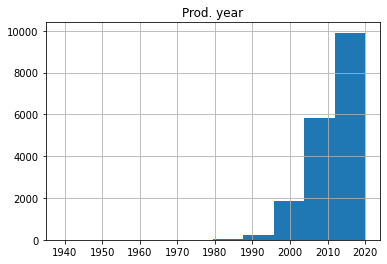

In [669]:
train_df.hist('Prod. year')

In [670]:
train_df['Prod. year']=train_df['Prod. year'].astype('int64')
train_df=train_df[(train_df_after_price_filter['Prod. year']>1990)]
train_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5efd700550>]],
      dtype=object)

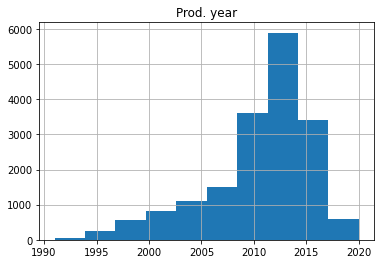

In [671]:
train_df.hist('Prod. year')

In [672]:
train_df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.778700e+04,17787.000000,17787.000000,17787.000000,17787.000000
mean,4.558412e+07,14081.834879,2010.792152,4.546185,6.596110
std,8.860982e+05,11387.501393,5.202611,1.157573,4.316126
min,2.324298e+07,1.000000,1991.000000,1.000000,0.000000
25%,4.569382e+07,4861.000000,2009.000000,4.000000,4.000000
50%,4.577193e+07,12287.000000,2012.000000,4.000000,6.000000
75%,4.580153e+07,20204.500000,2014.000000,4.000000,12.000000
max,4.581665e+07,47120.000000,2020.000000,16.000000,16.000000


## Convert "-" to NaN values of Levy

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5efd705b90>]],
      dtype=object)

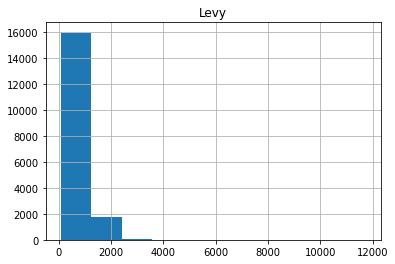

In [675]:
train_df['Levy'].replace({'-':np.nan},inplace=True)
train_df['Levy']=train_df['Levy'].astype('float64')
train_df['Levy'].fillna(int(train_df['Levy'].mean()),inplace=True)
train_df.hist('Levy')

In [676]:
train_df=train_df[train_df['Levy']<3000]
train_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,893.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5efd958190>]],
      dtype=object)

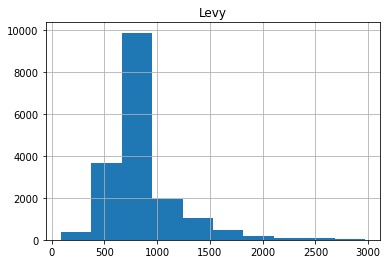

In [677]:
train_df.hist('Levy')

## Combine Manufacturer + Model

In [678]:
train_df['Car Model']=train_df['Manufacturer']+" "+train_df['Model']
train_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox
2,45774419,8467,893.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,HYUNDAI Sonata
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,HYUNDAI Tucson
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,CHEVROLET Captiva
19236,45813273,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12,HYUNDAI Sonata


## Eliminate Manufacturers, models of low count

In [679]:
train_df['Manufacturer'].value_counts()

TOYOTA           3498
HYUNDAI          3422
MERCEDES-BENZ    1851
FORD             1025
                 ... 
GREATWALL           1
LANCIA              1
HAVAL               1
PONTIAC             1
Name: Manufacturer, Length: 57, dtype: int64

In [680]:
manufacturer_counts=train_df['Manufacturer'].value_counts()
train_df=train_df.loc[train_df['Manufacturer'].isin(manufacturer_counts.index[manufacturer_counts > 2])]
train_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox
2,45774419,8467,893.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,HYUNDAI Sonata
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,HYUNDAI Tucson
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,CHEVROLET Captiva
19236,45813273,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12,HYUNDAI Sonata


In [681]:
train_df['Model'].value_counts()

Prius            1068
Sonata           1005
Elantra           907
Camry             905
                 ... 
Astra gi            1
E 220 cdi           1
Prius ფლაგინი       1
E 240 E 240         1
Name: Model, Length: 1447, dtype: int64

In [682]:
model_counts=train_df['Model'].value_counts()
train_df=train_df.loc[train_df['Model'].isin(model_counts.index[model_counts > 4])]
train_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox
2,45774419,8467,893.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,HYUNDAI Sonata
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,HYUNDAI Tucson
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,CHEVROLET Captiva
19236,45813273,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12,HYUNDAI Sonata


## drop-columns

In [683]:
train_df.drop(['ID'],axis=1,inplace=True)

## Splitting Engine Volume

In [684]:
train_df[['Engine_volume','Turbo_type']]=train_df['Engine volume'].str.split(" ",expand=True)
train_df["Turbo_type"].replace({None:'No','Turbo':'Yes'},inplace=True)
train_df.drop(['Engine volume'],axis=1,inplace=True)
train_df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Engine_volume,Turbo_type
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450,3.5,No
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox,3,No
2,8467,893.0,HONDA,FIT,2006,Hatchback,No,Petrol,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT,1.3,No
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape,2.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,HYUNDAI Sonata,2.4,No
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,HYUNDAI Tucson,2,No
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,CHEVROLET Captiva,2,No
19236,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12,HYUNDAI Sonata,2.4,No


## Convert datatypes

In [685]:
train_df[['Mileage','km']]=train_df['Mileage'].str.split(" ",expand=True)
train_df.drop(['km'],axis=1,inplace=True)
train_df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Engine_volume,Turbo_type
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450,3.5,No
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox,3,No
2,8467,893.0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT,1.3,No
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape,2.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,HYUNDAI Sonata,2.4,No
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,HYUNDAI Tucson,2,No
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,CHEVROLET Captiva,2,No
19236,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,186923,4.0,Automatic,Front,04-May,Left wheel,White,12,HYUNDAI Sonata,2.4,No


In [686]:
train_df['Engine_volume']=train_df['Engine_volume'].astype('float')
train_df['Mileage']=train_df['Mileage'].astype('int64')

## Correction of Mileage column

In [687]:
Q1=train_df['Mileage'].quantile(0.25)
Q3=train_df['Mileage'].quantile(0.75)
IQR=Q3-Q1
mileage_min=Q1-1.5*IQR
mileage_max=Q3+1.5*IQR
train_df=train_df[(train_df['Mileage']>mileage_min) & (train_df['Mileage']<mileage_max)]

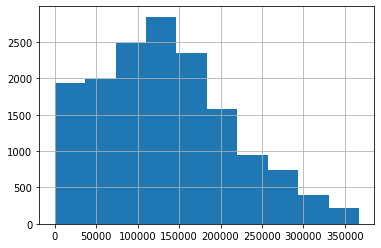

In [688]:
train_df['Mileage'].hist()

## Correction of Engine Volume

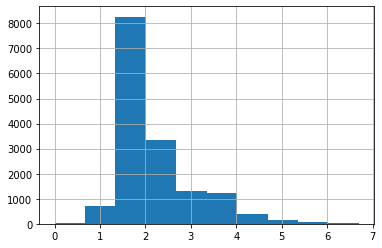

In [689]:
train_df['Engine_volume'].hist()

In [690]:
train_df=train_df[(train_df['Engine_volume']<5.4) & (train_df['Engine_volume']>0.4)]
train_df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Engine_volume,Turbo_type
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450,3.5,No
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox,3.0,No
2,8467,893.0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT,1.3,No
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape,2.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,HYUNDAI Sonata,2.4,No
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,HYUNDAI Tucson,2.0,No
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,CHEVROLET Captiva,2.0,No
19236,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,186923,4.0,Automatic,Front,04-May,Left wheel,White,12,HYUNDAI Sonata,2.4,No


In [691]:
train_df['Category'].value_counts()

Sedan          7098
Jeep           4214
Hatchback      2439
Minivan         526
               ... 
Goods wagon     179
Pickup           27
Cabriolet        10
Limousine         2
Name: Category, Length: 11, dtype: int64

# Test data cleaning

In [692]:
test_df=pd.read_csv("test.csv")
test_df

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,45682346,-,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,4,Tiptronic,Front,04-May,Left wheel,Black,6,NaN
8242,45649860,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907 km,8,Automatic,4x4,04-May,Left wheel,Black,0,NaN
8243,45809706,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000 km,4,Automatic,Front,04-May,Left wheel,Green,4,NaN
8244,45813163,448,HONDA,Insight,2012,Hatchback,Yes,Hybrid,1.3,321269 km,4,Automatic,Front,04-May,Left wheel,Red,12,NaN


## Convert "-" to NaN values of Levy

In [693]:
test_df['Levy'].replace({"-":np.nan},inplace=True)

## Combine Manufacturer + model

In [694]:
test_df['Car Model']=test_df['Manufacturer']+" "+test_df['Model']

## drop-columns

In [695]:
test_df.drop(['ID'],axis=1,inplace=True)


In [696]:
test_df['Levy']=test_df['Levy'].astype('float')


## Splitting Engine Volume

In [697]:
test_df[['Engine_volume','Turbo_type']]=test_df['Engine volume'].str.split(" ",expand=True)
test_df["Turbo_type"].replace({None:'No','Turbo':'Yes'},inplace=True)
test_df.drop(['Engine volume'],axis=1,inplace=True)
test_df

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Car Model,Engine_volume,Turbo_type
0,NaN,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,VOLKSWAGEN Golf,2.0,Yes
1,NaN,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,HYUNDAI Sonata,2.4,No
2,NaN,NISSAN,Tiida,2005,Sedan,No,Petrol,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,NISSAN Tiida,1.5,No
3,975.0,VOLVO,XC90,2012,Jeep,Yes,Petrol,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,VOLVO XC90,3.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,NaN,BMW,528 F10,2012,Sedan,Yes,Petrol,156000 km,4,Tiptronic,Front,04-May,Left wheel,Black,6,NaN,BMW 528 F10,2.8,Yes
8242,1646.0,LEXUS,GX 460,2015,Jeep,Yes,Petrol,102907 km,8,Automatic,4x4,04-May,Left wheel,Black,0,NaN,LEXUS GX 460,4.6,No
8243,784.0,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,3000 km,4,Automatic,Front,04-May,Left wheel,Green,4,NaN,TOYOTA Aqua,1.5,No
8244,448.0,HONDA,Insight,2012,Hatchback,Yes,Hybrid,321269 km,4,Automatic,Front,04-May,Left wheel,Red,12,NaN,HONDA Insight,1.3,No


## Correction of Mileage column

In [698]:
test_df[['Mileage','km']]=test_df['Mileage'].str.split(" ",expand=True)
test_df.drop(['km'],axis=1,inplace=True)
test_df['Mileage']=test_df['Mileage'].astype('int64')

# Correction of Engine volume

In [699]:
test_df['Engine_volume']=test_df['Engine_volume'].astype('float')
train_df['Cylinders']=train_df['Cylinders'].astype('int64')

# checking out for outliers

In [700]:
train_df['Airbags'].value_counts(),test_df['Airbags'].value_counts()

(4     4734
 12    4497
 0     2017
 8     1239
       ... 
 11      28
 14      17
 15       5
 13       2
 Name: Airbags, Length: 17, dtype: int64, 4     2435
 12    2380
 0     1098
 8      736
       ... 
 3       16
 14       3
 13       2
 15       1
 Name: Airbags, Length: 17, dtype: int64)

In [701]:
train_df['Color'].value_counts(),test_df['Color'].value_counts()

(Black     3931
 White     3643
 Silver    3208
 Grey      1908
           ... 
 Yellow      82
 Orange      71
 Purple      30
 Pink        18
 Name: Color, Length: 16, dtype: int64, Black       2163
 White       1903
 Silver      1630
 Grey        1025
             ... 
 Sky blue      55
 Yellow        39
 Purple        14
 Pink           5
 Name: Color, Length: 16, dtype: int64)

In [702]:
train_df['Wheel'].value_counts(),test_df['Wheel'].value_counts()

(Left wheel          14178
 Right-hand drive     1173
 Name: Wheel, dtype: int64, Left wheel          7631
 Right-hand drive     614
 Name: Wheel, dtype: int64)

In [703]:
train_df['Doors'].value_counts(),test_df['Doors'].value_counts()

(04-May    14758
 02-Mar      506
 >5           87
 Name: Doors, dtype: int64, 04-May    7841
 02-Mar     352
 >5          52
 Name: Doors, dtype: int64)

In [704]:
train_df['Drive wheels'].value_counts(),test_df['Drive wheels'].value_counts()

(Front    10799
 4x4       3001
 Rear      1551
 Name: Drive wheels, dtype: int64, Front    5500
 4x4      1744
 Rear     1001
 Name: Drive wheels, dtype: int64)

In [705]:
train_df['Gear box type'].value_counts(),test_df['Gear box type'].value_counts()

(Automatic    11256
 Tiptronic     2158
 Manual        1286
 Variator       651
 Name: Gear box type, dtype: int64, Automatic    5782
 Tiptronic    1361
 Manual        800
 Variator      302
 Name: Gear box type, dtype: int64)

In [706]:
train_df['Cylinders'].value_counts(),test_df['Cylinders'].value_counts()

(4     11899
 6      2633
 8       551
 5       117
       ...  
 16        4
 7         2
 14        1
 9         1
 Name: Cylinders, Length: 13, dtype: int64, 4      6115
 6      1473
 8       474
 5        68
        ... 
 127       1
 15        1
 11        1
 9         1
 Name: Cylinders, Length: 14, dtype: int64)

In [707]:
train_df['Fuel type'].value_counts(),test_df['Fuel type'].value_counts()

(Petrol            7873
 Diesel            3291
 Hybrid            3168
 LPG                579
 CNG                369
 Plug-in Hybrid      71
 Name: Fuel type, dtype: int64, Petrol            4342
 Diesel            1737
 Hybrid            1511
 LPG                415
 CNG                207
 Plug-in Hybrid      32
 Hydrogen             1
 Name: Fuel type, dtype: int64)

In [708]:
train_df['Leather interior'].value_counts(),test_df['Leather interior'].value_counts()

(Yes    11145
 No      4206
 Name: Leather interior, dtype: int64, Yes    5972
 No     2273
 Name: Leather interior, dtype: int64)

In [709]:
train_df['Category'].value_counts(),test_df['Category'].value_counts()

(Sedan          7098
 Jeep           4214
 Hatchback      2439
 Minivan         526
                ... 
 Goods wagon     179
 Pickup           27
 Cabriolet        10
 Limousine         2
 Name: Category, Length: 11, dtype: int64, Sedan          3798
 Jeep           2348
 Hatchback      1191
 Minivan         287
                ... 
 Goods wagon      77
 Cabriolet        25
 Pickup           20
 Limousine         4
 Name: Category, Length: 11, dtype: int64)

In [710]:
train_Y=train_df[['Price']]

In [711]:
train_Y

,Price
0,13328
1,16621
2,8467
3,3607
...,...
19233,15681
19234,26108
19235,5331
19236,470


In [712]:
train_X=train_df.drop(['Price'],axis=1)
train_X

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450,3.5,No
1,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox,3.0,No
2,893.0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT,1.3,No
3,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape,2.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600,4,Tiptronic,Front,04-May,Left wheel,Red,8,HYUNDAI Sonata,2.4,No
19234,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365,4,Automatic,Front,04-May,Left wheel,Grey,4,HYUNDAI Tucson,2.0,No
19235,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258,4,Automatic,Front,04-May,Left wheel,Black,4,CHEVROLET Captiva,2.0,No
19236,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,186923,4,Automatic,Front,04-May,Left wheel,White,12,HYUNDAI Sonata,2.4,No


In [713]:
test_X=test_df.drop(['Price'],axis=1)

In [714]:
test_X

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Engine_volume,Turbo_type
0,NaN,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,VOLKSWAGEN Golf,2.0,Yes
1,NaN,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,HYUNDAI Sonata,2.4,No
2,NaN,NISSAN,Tiida,2005,Sedan,No,Petrol,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NISSAN Tiida,1.5,No
3,975.0,VOLVO,XC90,2012,Jeep,Yes,Petrol,143000,6,Automatic,4x4,04-May,Left wheel,Blue,12,VOLVO XC90,3.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,NaN,BMW,528 F10,2012,Sedan,Yes,Petrol,156000,4,Tiptronic,Front,04-May,Left wheel,Black,6,BMW 528 F10,2.8,Yes
8242,1646.0,LEXUS,GX 460,2015,Jeep,Yes,Petrol,102907,8,Automatic,4x4,04-May,Left wheel,Black,0,LEXUS GX 460,4.6,No
8243,784.0,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,3000,4,Automatic,Front,04-May,Left wheel,Green,4,TOYOTA Aqua,1.5,No
8244,448.0,HONDA,Insight,2012,Hatchback,Yes,Hybrid,321269,4,Automatic,Front,04-May,Left wheel,Red,12,HONDA Insight,1.3,No


In [715]:
test_X.columns

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Mileage', 'Cylinders',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags',
       'Car Model', 'Engine_volume', 'Turbo_type'],
      dtype='object')

In [716]:
train_X.columns

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Mileage', 'Cylinders',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags',
       'Car Model', 'Engine_volume', 'Turbo_type'],
      dtype='object')

In [717]:
test_X.info(),train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              5791 non-null   float64
 1   Manufacturer      8245 non-null   object 
 2   Model             8245 non-null   object 
 3   Prod. year        8245 non-null   int64  
 4   Category          8245 non-null   object 
 5   Leather interior  8245 non-null   object 
 6   Fuel type         8245 non-null   object 
 7   Mileage           8245 non-null   int64  
 8   Cylinders         8245 non-null   int64  
 9   Gear box type     8245 non-null   object 
 10  Drive wheels      8245 non-null   object 
 11  Doors             8245 non-null   object 
 12  Wheel             8245 non-null   object 
 13  Color             8245 non-null   object 
 14  Airbags           8245 non-null   int64  
 15  Car Model         8245 non-null   object 
 16  Engine_volume     8245 non-null   float64


(None, None)

In [718]:
train_Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15351 entries, 0 to 19236
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   15351 non-null  int64
dtypes: int64(1)
memory usage: 239.9 KB


In [719]:
test_X.head(2)

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Engine_volume,Turbo_type
0,NaN,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,VOLKSWAGEN Golf,2.0,Yes
1,NaN,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,HYUNDAI Sonata,2.4,No


In [720]:
train_X.head(2)

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450,3.5,No
1,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox,3.0,No


# **Part-2 **

# Import

In [721]:
from sklearn.metrics import mean_squared_log_error

# Target encoding

In [722]:
!pip install --upgrade category_encoders
from category_encoders import TargetEncoder

In [723]:
train_X

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450,3.5,No
1,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox,3.0,No
2,893.0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT,1.3,No
3,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape,2.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600,4,Tiptronic,Front,04-May,Left wheel,Red,8,HYUNDAI Sonata,2.4,No
19234,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365,4,Automatic,Front,04-May,Left wheel,Grey,4,HYUNDAI Tucson,2.0,No
19235,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258,4,Automatic,Front,04-May,Left wheel,Black,4,CHEVROLET Captiva,2.0,No
19236,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,186923,4,Automatic,Front,04-May,Left wheel,White,12,HYUNDAI Sonata,2.4,No


In [724]:
train_Y.head(2)

,Price
0,13328
1,16621


In [725]:
test_X

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Engine_volume,Turbo_type
0,NaN,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,VOLKSWAGEN Golf,2.0,Yes
1,NaN,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,HYUNDAI Sonata,2.4,No
2,NaN,NISSAN,Tiida,2005,Sedan,No,Petrol,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NISSAN Tiida,1.5,No
3,975.0,VOLVO,XC90,2012,Jeep,Yes,Petrol,143000,6,Automatic,4x4,04-May,Left wheel,Blue,12,VOLVO XC90,3.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,NaN,BMW,528 F10,2012,Sedan,Yes,Petrol,156000,4,Tiptronic,Front,04-May,Left wheel,Black,6,BMW 528 F10,2.8,Yes
8242,1646.0,LEXUS,GX 460,2015,Jeep,Yes,Petrol,102907,8,Automatic,4x4,04-May,Left wheel,Black,0,LEXUS GX 460,4.6,No
8243,784.0,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,3000,4,Automatic,Front,04-May,Left wheel,Green,4,TOYOTA Aqua,1.5,No
8244,448.0,HONDA,Insight,2012,Hatchback,Yes,Hybrid,321269,4,Automatic,Front,04-May,Left wheel,Red,12,HONDA Insight,1.3,No


In [726]:
test_X.describe()

,Levy,Prod. year,Mileage,Cylinders,Airbags,Engine_volume
count,5791.000000,8245.000000,8.245000e+03,8245.000000,8245.000000,8245.000000
mean,917.859955,2010.911583,1.318247e+06,4.618799,6.519102,2.325045
std,441.670055,5.548762,4.776089e+07,1.817581,4.350323,0.889286
min,87.000000,1943.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,640.000000,2009.000000,7.155100e+04,4.000000,4.000000,1.800000
50%,784.000000,2012.000000,1.276750e+05,4.000000,6.000000,2.000000
75%,1077.000000,2014.000000,1.920000e+05,4.000000,12.000000,2.500000
max,7528.000000,2020.000000,2.147484e+09,127.000000,16.000000,10.800000


In [727]:
columns_drop=['Category','Drive wheels','Doors','Wheel','Mileage','Color','Leather interior',]

In [728]:
test_X['Fuel type']=test_X['Fuel type'].replace({'Hydrogen':'CNG'})
train_X['Fuel type']=train_X['Fuel type'].replace({'Hydrogen':'CNG'})

In [729]:
train_X['Cylinders']=train_X['Cylinders'].replace({14:12,16:12,9:8})
test_X['Cylinders']=test_X['Cylinders'].replace({14:12,9:8,11:8,15:8,127:12})

In [730]:
train_X.drop(columns_drop,axis=1,inplace=True)
train_X

,Levy,Manufacturer,Model,Prod. year,Fuel type,Cylinders,Gear box type,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,LEXUS,RX 450,2010,Hybrid,6,Automatic,12,LEXUS RX 450,3.5,No
1,1018.0,CHEVROLET,Equinox,2011,Petrol,6,Tiptronic,8,CHEVROLET Equinox,3.0,No
2,893.0,HONDA,FIT,2006,Petrol,4,Variator,2,HONDA FIT,1.3,No
3,862.0,FORD,Escape,2011,Hybrid,4,Automatic,0,FORD Escape,2.5,No
...,...,...,...,...,...,...,...,...,...,...,...
19233,831.0,HYUNDAI,Sonata,2011,Petrol,4,Tiptronic,8,HYUNDAI Sonata,2.4,No
19234,836.0,HYUNDAI,Tucson,2010,Diesel,4,Automatic,4,HYUNDAI Tucson,2.0,No
19235,1288.0,CHEVROLET,Captiva,2007,Diesel,4,Automatic,4,CHEVROLET Captiva,2.0,No
19236,753.0,HYUNDAI,Sonata,2012,Hybrid,4,Automatic,12,HYUNDAI Sonata,2.4,No


In [731]:
test_X.drop(columns_drop,axis=1,inplace=True)

In [732]:
test_X.describe(),train_X.describe()

(              Levy   Prod. year    Cylinders      Airbags  Engine_volume
 count  5791.000000  8245.000000  8245.000000  8245.000000    8245.000000
 mean    917.859955  2010.911583     4.603517     6.519102       2.325045
 std     441.670055     5.548762     1.215344     4.350323       0.889286
 min      87.000000  1943.000000     1.000000     0.000000       0.000000
 25%     640.000000  2009.000000     4.000000     4.000000       1.800000
 50%     784.000000  2012.000000     4.000000     6.000000       2.000000
 75%    1077.000000  2014.000000     4.000000    12.000000       2.500000
 max    7528.000000  2020.000000    12.000000    16.000000      10.800000,
                Levy    Prod. year     Cylinders       Airbags  Engine_volume
 count  15351.000000  15351.000000  15351.000000  15351.000000   15351.000000
 mean     874.305387   2011.076217      4.493453      6.519119       2.241626
 std      305.583885      4.976275      1.067955      4.342144       0.762094
 min      247.000000 

In [733]:
train_X.drop(['Manufacturer','Model'],axis=1,inplace=True)
test_X.drop(['Manufacturer','Model'],axis=1,inplace=True)

In [734]:
train_X

,Levy,Prod. year,Fuel type,Cylinders,Gear box type,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,2010,Hybrid,6,Automatic,12,LEXUS RX 450,3.5,No
1,1018.0,2011,Petrol,6,Tiptronic,8,CHEVROLET Equinox,3.0,No
2,893.0,2006,Petrol,4,Variator,2,HONDA FIT,1.3,No
3,862.0,2011,Hybrid,4,Automatic,0,FORD Escape,2.5,No
...,...,...,...,...,...,...,...,...,...
19233,831.0,2011,Petrol,4,Tiptronic,8,HYUNDAI Sonata,2.4,No
19234,836.0,2010,Diesel,4,Automatic,4,HYUNDAI Tucson,2.0,No
19235,1288.0,2007,Diesel,4,Automatic,4,CHEVROLET Captiva,2.0,No
19236,753.0,2012,Hybrid,4,Automatic,12,HYUNDAI Sonata,2.4,No


In [735]:
te = TargetEncoder(cols=['Car Model']).fit(train_X, train_Y)
te.transform(train_X).head(2)

,Levy,Prod. year,Fuel type,Cylinders,Gear box type,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,2010,Hybrid,6,Automatic,12,7673.283784,3.5,No
1,1018.0,2011,Petrol,6,Tiptronic,8,7508.500037,3.0,No


In [736]:
train_X_after_target_encoding=te.transform(train_X)
train_X_after_target_encoding

,Levy,Prod. year,Fuel type,Cylinders,Gear box type,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,2010,Hybrid,6,Automatic,12,7673.283784,3.5,No
1,1018.0,2011,Petrol,6,Tiptronic,8,7508.500037,3.0,No
2,893.0,2006,Petrol,4,Variator,2,10844.135011,1.3,No
3,862.0,2011,Hybrid,4,Automatic,0,9531.104839,2.5,No
...,...,...,...,...,...,...,...,...,...
19233,831.0,2011,Petrol,4,Tiptronic,8,12316.864542,2.4,No
19234,836.0,2010,Diesel,4,Automatic,4,27001.218997,2.0,No
19235,1288.0,2007,Diesel,4,Automatic,4,17033.642336,2.0,No
19236,753.0,2012,Hybrid,4,Automatic,12,12316.864542,2.4,No


In [737]:
test_X_after_target_encoding=te.transform(test_X)
test_X_after_target_encoding

,Levy,Prod. year,Fuel type,Cylinders,Gear box type,Airbags,Car Model,Engine_volume,Turbo_type
0,NaN,2012,Diesel,4,Manual,10,6777.155172,2.0,Yes
1,NaN,2012,Petrol,4,Tiptronic,10,12316.864542,2.4,No
2,NaN,2005,Petrol,4,Automatic,8,7290.567568,1.5,No
3,975.0,2012,Petrol,6,Automatic,12,14177.598593,3.2,No
...,...,...,...,...,...,...,...,...,...
8241,NaN,2012,Petrol,4,Tiptronic,6,14177.598593,2.8,Yes
8242,1646.0,2015,Petrol,8,Automatic,0,14287.783626,4.6,No
8243,784.0,2017,Petrol,4,Automatic,4,16411.734628,1.5,No
8244,448.0,2012,Hybrid,4,Automatic,12,6414.347826,1.3,No


# Pipeline

In [738]:
train_X_after_target_encoding.columns

Index(['Levy', 'Prod. year', 'Fuel type', 'Cylinders', 'Gear box type',
       'Airbags', 'Car Model', 'Engine_volume', 'Turbo_type'],
      dtype='object')

## Categorical data

In [739]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


categorical_cols = ['Fuel type','Gear box type','Turbo_type']
categorical_pipeline = Pipeline(steps=[
                                          ('onehot', OneHotEncoder(drop='first',sparse=False))
                                   ])

In [740]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline


categorical_cols_ordinal = ['Cylinders','Airbags']
categorical_pipeline_ordinal = Pipeline(steps=[
                                          ('ordinal', OrdinalEncoder())
                                   ])

## Numerical data

In [741]:
from sklearn.impute import SimpleImputer

numerical_cols = ['Levy','Prod. year','Engine_volume','Car Model']
numerical_pipeline = Pipeline(steps=[('imputer', SimpleImputer())])

## Column Transfer

In [742]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
                                        transformers=[
                                            ('cat', categorical_pipeline,categorical_cols),
                                            ('ord', categorical_pipeline_ordinal, categorical_cols_ordinal),                                        
                                            ('num', numerical_pipeline,numerical_cols)], 
                                        remainder='passthrough'
                                      )

In [743]:
column_transformer.fit_transform(train_X_after_target_encoding)

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.01000000e+03, 3.50000000e+00, 7.67328378e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01100000e+03, 3.00000000e+00, 7.50850004e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00600000e+03, 1.30000000e+00, 1.08441350e+04],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01000000e+03, 2.00000000e+00, 2.70012190e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00700000e+03, 2.00000000e+00, 1.70336423e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.01200000e+03, 2.40000000e+00, 1.23168645e+04]])

In [744]:
column_transformer.transform(test_X_after_target_encoding)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01200000e+03, 2.00000000e+00, 6.77715517e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01200000e+03, 2.40000000e+00, 1.23168645e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00500000e+03, 1.50000000e+00, 7.29056757e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01500000e+03, 4.60000000e+00, 1.42877836e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01700000e+03, 1.50000000e+00, 1.64117346e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.01200000e+03, 1.30000000e+00, 6.41434783e+03]])

In [745]:
column_transformer_train_X=column_transformer.fit_transform(train_X_after_target_encoding)
column_transformer_test_X=column_transformer.transform(test_X_after_target_encoding)

In [746]:
column_transformer.transform(test_X_after_target_encoding).shape

(8245, 15)

## polynomial transfer

In [747]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=1,interaction_only=False)
polynomial_features.fit_transform(column_transformer_train_X)

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.01000000e+03, 3.50000000e+00, 7.67328378e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01100000e+03, 3.00000000e+00, 7.50850004e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00600000e+03, 1.30000000e+00, 1.08441350e+04],
       ...,
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.01000000e+03, 2.00000000e+00, 2.70012190e+04],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.00700000e+03, 2.00000000e+00, 1.70336423e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.01200000e+03, 2.40000000e+00, 1.23168645e+04]])

In [748]:
polynomial_features.transform(column_transformer_test_X)

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.01200000e+03, 2.00000000e+00, 6.77715517e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01200000e+03, 2.40000000e+00, 1.23168645e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00500000e+03, 1.50000000e+00, 7.29056757e+03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01500000e+03, 4.60000000e+00, 1.42877836e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01700000e+03, 1.50000000e+00, 1.64117346e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.01200000e+03, 1.30000000e+00, 6.41434783e+03]])

In [749]:
polynomial_features.transform(column_transformer_test_X).shape

(8245, 16)

In [750]:
from sklearn.model_selection import train_test_split

train_X_split, validation_X_split, train_Y_split, validation_Y_split = \
                         train_test_split(train_X_after_target_encoding, train_Y, test_size=0.3,
                         shuffle=True, random_state=123)

print('Train X size', train_X_split.shape, '\nclass proportions\n', train_Y_split.value_counts())
print('\nValidation X size', validation_X_split.shape, '\nclass proportions\n', validation_Y_split.value_counts())

Train X size (10745, 9) 
class proportions
 Price
15681    171
470      168
392      167
14113    138
        ... 
15950      1
15925      1
29504      1
1          1
Length: 1523, dtype: int64

Validation X size (4606, 9) 
class proportions
 Price
470      68
15681    68
14113    61
18817    58
         ..
22063     1
22000     1
21987     1
1         1
Length: 942, dtype: int64


# Pipeline Estimator

In [751]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso
#from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline(steps=[('preprocessor', column_transformer),
                       ('poly',polynomial_features),
                       ('scaler', StandardScaler()),
                       ('selector', SelectKBest(k='all')),
                       ('estimator', Lasso())])


pipe.fit(train_X_split, train_Y_split)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop='first',
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                                                                 sparse=False))],
                                      

In [752]:
predicted_test_Y = pipe.predict(test_X_after_target_encoding)
predicted_test_Y

array([13099.47301037, 17297.64377021,  2438.32734458, ...,
       16637.39968926, 18535.83519383,  3385.28839362])

In [753]:
predicted_test_Y.shape

(8245,)

In [754]:
predicted_validation_Y=pipe.predict(validation_X_split)
predicted_validation_Y

array([29680.08242081, 22300.26929852, 15200.43308622, ...,
        6312.07654851,  5214.4255322 , 12914.36019793])

In [755]:
predicted_test_Y_1shape=predicted_test_Y.ravel()
predicted_validation_Y_1shape=predicted_validation_Y.ravel()
test_Y=pd.Series(predicted_test_Y_1shape)
predicted_validation_Y=pd.Series(predicted_validation_Y_1shape)

In [756]:
test_Y

0       13099.473010
1       17297.643770
2        2438.327345
3       11626.059117
            ...     
8241    22874.394726
8242    16637.399689
8243    18535.835194
8244     3385.288394
Length: 8245, dtype: float64

In [757]:
predicted_validation_Y

0       29680.082421
1       22300.269299
2       15200.433086
3       18527.917951
            ...     
4602     8901.645020
4603     6312.076549
4604     5214.425532
4605    12914.360198
Length: 4606, dtype: float64

In [758]:
predicted_test_Y_final = pd.DataFrame(test_Y, columns=["Price"])
predicted_validation_Y_final=pd.DataFrame(predicted_validation_Y,columns=['Price'])

In [759]:
predicted_test_Y_final

,Price
0,13099.473010
1,17297.643770
2,2438.327345
3,11626.059117
...,...
8241,22874.394726
8242,16637.399689
8243,18535.835194
8244,3385.288394


In [760]:
predicted_validation_Y_final,validation_Y_split

(             Price
 0     29680.082421
 1     22300.269299
 2     15200.433086
 3     18527.917951
 ...            ...
 4602   8901.645020
 4603   6312.076549
 4604   5214.425532
 4605  12914.360198
 
 [4606 rows x 1 columns],        Price
 16684  27463
 9864   26657
 17451  23207
 12185  16935
 ...      ...
 16259  11133
 12204  13956
 7435    6586
 17094  16308
 
 [4606 rows x 1 columns])

In [761]:
predicted_validation_Y_final=predicted_validation_Y_final.applymap(lambda x:abs(x) if x<0 else x)

In [762]:
np.sqrt(mean_squared_log_error(validation_Y_split, predicted_validation_Y_final))

1.5409146869849528

In [763]:
predicted_test_Y_final['Price']=predicted_test_Y_final['Price'].abs()

In [764]:
predicted_train_Y=pipe.predict(train_X_after_target_encoding)
predicted_train_Y

array([ 2846.82195181, 13479.87508162, 13200.01547815, ...,
       24924.23378203, 14258.68088946,  8074.37735165])

In [765]:
predicted_train_Y_1shape=predicted_train_Y.ravel()
predicted_train_Y=pd.Series(predicted_train_Y_1shape)

In [766]:
predicted_train_Y_final=pd.DataFrame(predicted_train_Y,columns=['Price'])

In [767]:
predicted_train_Y_final,train_Y

(              Price
 0       2846.821952
 1      13479.875082
 2      13200.015478
 3       8248.898418
 ...             ...
 15347  17278.038054
 15348  24924.233782
 15349  14258.680889
 15350   8074.377352
 
 [15351 rows x 1 columns],        Price
 0      13328
 1      16621
 2       8467
 3       3607
 ...      ...
 19233  15681
 19234  26108
 19235   5331
 19236    470
 
 [15351 rows x 1 columns])

In [768]:
predicted_train_Y_final['Price']=predicted_train_Y_final['Price'].abs()

In [769]:
np.sqrt(mean_squared_log_error(predicted_train_Y_final,train_Y))

1.5280882236930706

In [770]:
predicted_test_Y_final.to_excel('submission.xlsx',index=False)

# 2 method

# it is actually performed with data without outliers

In [771]:
import pandas as pd
import requests
from io import StringIO

url='https://drive.google.com/file/d/1187NMDGpGzlb_gHvCXEcy5PVIbgNQHD0/view?usp=sharing'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
test_X= pd.read_csv(csv_raw)


In [772]:
test_X

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Engine_volume,Turbo_type
0,NaN,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,VOLKSWAGEN Golf,2.0,Yes
1,NaN,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,HYUNDAI Sonata,2.4,No
2,NaN,NISSAN,Tiida,2005,Sedan,No,Petrol,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NISSAN Tiida,1.5,No
3,975.0,VOLVO,XC90,2012,Jeep,Yes,Petrol,143000,6,Automatic,4x4,04-May,Left wheel,Blue,12,VOLVO XC90,3.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,NaN,BMW,528 F10,2012,Sedan,Yes,Petrol,156000,4,Tiptronic,Front,04-May,Left wheel,Black,6,BMW 528 F10,2.8,Yes
8242,1646.0,LEXUS,GX 460,2015,Jeep,Yes,Petrol,102907,8,Automatic,4x4,04-May,Left wheel,Black,0,LEXUS GX 460,4.6,No
8243,784.0,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,3000,4,Automatic,Front,04-May,Left wheel,Green,4,TOYOTA Aqua,1.5,No
8244,448.0,HONDA,Insight,2012,Hatchback,Yes,Hybrid,321269,4,Automatic,Front,04-May,Left wheel,Red,12,HONDA Insight,1.3,No


In [831]:
url='https://drive.google.com/file/d/1diUfU4ckAExqs7QbOciNwOXZ_YOzhZBt/view?usp=sharing'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
train_X= pd.read_csv(csv_raw)

In [774]:
train_X

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450,3.5,No
1,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox,3.0,No
2,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape,2.5,No
3,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4,Automatic,Front,04-May,Left wheel,Silver,4,HONDA FIT,1.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12320,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,107800,6,Automatic,Rear,04-May,Left wheel,Grey,12,MERCEDES-BENZ E 350,3.5,No
12321,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600,4,Tiptronic,Front,04-May,Left wheel,Red,8,HYUNDAI Sonata,2.4,No
12322,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365,4,Automatic,Front,04-May,Left wheel,Grey,4,HYUNDAI Tucson,2.0,No
12323,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258,4,Automatic,Front,04-May,Left wheel,Black,4,CHEVROLET Captiva,2.0,No


In [775]:
url='https://drive.google.com/file/d/1_Bj24Dl4V1CcY6WEnyZT0TAddGj_bA9i/view?usp=sharing'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
train_Y= pd.read_csv(csv_raw)

In [776]:
train_Y

,Price
0,13328
1,16621
2,3607
3,11726
...,...
12320,5802
12321,15681
12322,26108
12323,5331


# Target encoding

In [777]:
!pip install --upgrade category_encoders
from category_encoders import TargetEncoder

In [778]:
test_X.describe()

,Levy,Prod. year,Mileage,Cylinders,Airbags,Engine_volume
count,5791.000000,8245.000000,8.245000e+03,8245.000000,8245.000000,8245.000000
mean,917.859955,2010.911583,1.318247e+06,4.604851,6.519102,2.325045
std,441.670055,5.548762,4.776089e+07,1.222098,4.350323,0.889286
min,87.000000,1943.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,640.000000,2009.000000,7.155100e+04,4.000000,4.000000,1.800000
50%,784.000000,2012.000000,1.276750e+05,4.000000,6.000000,2.000000
75%,1077.000000,2014.000000,1.920000e+05,4.000000,12.000000,2.500000
max,7528.000000,2020.000000,2.147484e+09,14.000000,16.000000,10.800000


In [779]:
columns_drop=['Category','Drive wheels','Doors','Wheel','Mileage','Color','Leather interior',]

In [780]:
train_X.drop(columns_drop,axis=1,inplace=True)
train_X

,Levy,Manufacturer,Model,Prod. year,Fuel type,Cylinders,Gear box type,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,LEXUS,RX 450,2010,Hybrid,6,Automatic,12,LEXUS RX 450,3.5,No
1,1018.0,CHEVROLET,Equinox,2011,Petrol,6,Tiptronic,8,CHEVROLET Equinox,3.0,No
2,862.0,FORD,Escape,2011,Hybrid,4,Automatic,0,FORD Escape,2.5,No
3,446.0,HONDA,FIT,2014,Petrol,4,Automatic,4,HONDA FIT,1.3,No
...,...,...,...,...,...,...,...,...,...,...,...
12320,1055.0,MERCEDES-BENZ,E 350,2013,Diesel,6,Automatic,12,MERCEDES-BENZ E 350,3.5,No
12321,831.0,HYUNDAI,Sonata,2011,Petrol,4,Tiptronic,8,HYUNDAI Sonata,2.4,No
12322,836.0,HYUNDAI,Tucson,2010,Diesel,4,Automatic,4,HYUNDAI Tucson,2.0,No
12323,1288.0,CHEVROLET,Captiva,2007,Diesel,4,Automatic,4,CHEVROLET Captiva,2.0,No


In [781]:
test_X.drop(columns_drop,axis=1,inplace=True)

In [782]:
test_X.describe(),train_X.describe()

(              Levy   Prod. year    Cylinders      Airbags  Engine_volume
 count  5791.000000  8245.000000  8245.000000  8245.000000    8245.000000
 mean    917.859955  2010.911583     4.604851     6.519102       2.325045
 std     441.670055     5.548762     1.222098     4.350323       0.889286
 min      87.000000  1943.000000     1.000000     0.000000       0.000000
 25%     640.000000  2009.000000     4.000000     4.000000       1.800000
 50%     784.000000  2012.000000     4.000000     6.000000       2.000000
 75%    1077.000000  2014.000000     4.000000    12.000000       2.500000
 max    7528.000000  2020.000000    14.000000    16.000000      10.800000,
                Levy    Prod. year     Cylinders       Airbags  Engine_volume
 count   8949.000000  12324.000000  12324.000000  12324.000000   12324.000000
 mean     862.067717   2011.673564      4.416504      6.547468       2.183114
 std      435.620499      5.003008      1.063247      4.017179       0.763500
 min      173.000000 

In [783]:
test_X['Cylinders'].unique(),train_X['Cylinders'].unique()

(array([ 4,  6,  8,  5,  3,  1, 10,  7, 12,  2, 14,  9]),
 array([ 6,  4,  1,  8, 12,  3, 16,  2,  5,  7,  9, 10, 14]))

In [784]:
train_X['Cylinders']=train_X['Cylinders'].replace({14:12,16:12,9:8})
test_X['Cylinders']=test_X['Cylinders'].replace({14:12,9:8})

In [785]:
test_X['Cylinders'].unique(),train_X['Cylinders'].unique()

(array([ 4,  6,  8,  5,  3,  1, 10,  7, 12,  2]),
 array([ 6,  4,  1,  8, 12,  3,  2,  5,  7, 10]))

In [786]:
test_X['Fuel type'].unique(),train_X['Fuel type'].unique()

(array(['Diesel', 'Petrol', 'LPG', 'Hybrid', 'CNG', 'Plug-in Hybrid',
        'Hydrogen'], dtype=object),
 array(['Hybrid', 'Petrol', 'Diesel', 'Plug-in Hybrid', 'LPG', 'CNG',
        'Hydrogen'], dtype=object))

In [787]:
test_X['Fuel type']=test_X['Fuel type'].replace({'Hydrogen':'CNG'})

In [788]:
train_X['Fuel type']=train_X['Fuel type'].replace({'Hydrogen':'CNG'})

In [789]:
train_X.drop(['Manufacturer','Model'],axis=1,inplace=True)
test_X.drop(['Manufacturer','Model'],axis=1,inplace=True)

In [790]:
test_X['Fuel type'].unique(),train_X['Fuel type'].unique()

(array(['Diesel', 'Petrol', 'LPG', 'Hybrid', 'CNG', 'Plug-in Hybrid'],
       dtype=object),
 array(['Hybrid', 'Petrol', 'Diesel', 'Plug-in Hybrid', 'LPG', 'CNG'],
       dtype=object))

In [791]:
train_X

,Levy,Prod. year,Fuel type,Cylinders,Gear box type,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,2010,Hybrid,6,Automatic,12,LEXUS RX 450,3.5,No
1,1018.0,2011,Petrol,6,Tiptronic,8,CHEVROLET Equinox,3.0,No
2,862.0,2011,Hybrid,4,Automatic,0,FORD Escape,2.5,No
3,446.0,2014,Petrol,4,Automatic,4,HONDA FIT,1.3,No
...,...,...,...,...,...,...,...,...,...
12320,1055.0,2013,Diesel,6,Automatic,12,MERCEDES-BENZ E 350,3.5,No
12321,831.0,2011,Petrol,4,Tiptronic,8,HYUNDAI Sonata,2.4,No
12322,836.0,2010,Diesel,4,Automatic,4,HYUNDAI Tucson,2.0,No
12323,1288.0,2007,Diesel,4,Automatic,4,CHEVROLET Captiva,2.0,No


# target encoding

In [792]:
te = TargetEncoder(cols=['Car Model']).fit(train_X, train_Y)
te.transform(train_X).head(2)

,Levy,Prod. year,Fuel type,Cylinders,Gear box type,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,2010,Hybrid,6,Automatic,12,16778.013889,3.5,No
1,1018.0,2011,Petrol,6,Tiptronic,8,12494.798963,3.0,No


In [793]:
train_X_after_target_encoding=te.transform(train_X)
test_X_after_target_encoding=te.transform(test_X)

In [794]:
test_X_after_target_encoding

,Levy,Prod. year,Fuel type,Cylinders,Gear box type,Airbags,Car Model,Engine_volume,Turbo_type
0,NaN,2012,Diesel,4,Manual,10,8524.375000,2.0,Yes
1,NaN,2012,Petrol,4,Tiptronic,10,20963.011161,2.4,No
2,NaN,2005,Petrol,4,Automatic,8,8575.509091,1.5,No
3,975.0,2012,Petrol,6,Automatic,12,16389.298005,3.2,No
...,...,...,...,...,...,...,...,...,...
8241,NaN,2012,Petrol,4,Tiptronic,6,20081.101996,2.8,Yes
8242,1646.0,2015,Petrol,8,Automatic,0,36802.473684,4.6,No
8243,784.0,2017,Petrol,4,Automatic,4,17922.191919,1.5,No
8244,448.0,2012,Hybrid,4,Automatic,12,10488.618182,1.3,No


In [795]:
train_X_after_target_encoding

,Levy,Prod. year,Fuel type,Cylinders,Gear box type,Airbags,Car Model,Engine_volume,Turbo_type
0,1399.0,2010,Hybrid,6,Automatic,12,16778.013889,3.5,No
1,1018.0,2011,Petrol,6,Tiptronic,8,12494.798963,3.0,No
2,862.0,2011,Hybrid,4,Automatic,0,15262.048387,2.5,No
3,446.0,2014,Petrol,4,Automatic,4,14726.911392,1.3,No
...,...,...,...,...,...,...,...,...,...
12320,1055.0,2013,Diesel,6,Automatic,12,14426.620253,3.5,No
12321,831.0,2011,Petrol,4,Tiptronic,8,20963.011161,2.4,No
12322,836.0,2010,Diesel,4,Automatic,4,31880.311054,2.0,No
12323,1288.0,2007,Diesel,4,Automatic,4,18488.473282,2.0,No


# Pipeline

In [796]:
train_X_after_target_encoding.columns

Index(['Levy', 'Prod. year', 'Fuel type', 'Cylinders', 'Gear box type',
       'Airbags', 'Car Model', 'Engine_volume', 'Turbo_type'],
      dtype='object')

## Categorical data

In [797]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


categorical_cols = ['Fuel type','Gear box type','Turbo_type']
categorical_pipeline = Pipeline(steps=[
                                          ('onehot', OneHotEncoder(drop='first',sparse=False))
                                   ])

In [798]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline


categorical_cols_ordinal = ['Cylinders','Airbags']
categorical_pipeline_ordinal = Pipeline(steps=[
                                          ('ordinal', OrdinalEncoder())
                                   ])

## Numerical data

In [799]:
from sklearn.impute import SimpleImputer

numerical_cols = ['Levy','Prod. year','Engine_volume','Car Model']
numerical_pipeline = Pipeline(steps=[('imputer', SimpleImputer())])

## Column Transfer

In [800]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
                                        transformers=[
                                            ('cat', categorical_pipeline,categorical_cols),
                                            ('ord', categorical_pipeline_ordinal, categorical_cols_ordinal),                                        
                                            ('num', numerical_pipeline,numerical_cols)], 
                                        remainder='passthrough'
                                      )

In [801]:
column_transformer.fit_transform(train_X_after_target_encoding)

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.01000000e+03, 3.50000000e+00, 1.67780139e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01100000e+03, 3.00000000e+00, 1.24947990e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.01100000e+03, 2.50000000e+00, 1.52620484e+04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01100000e+03, 2.40000000e+00, 2.09630112e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01000000e+03, 2.00000000e+00, 3.18803111e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00700000e+03, 2.00000000e+00, 1.84884733e+04]])

In [802]:
column_transformer.transform(test_X_after_target_encoding)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01200000e+03, 2.00000000e+00, 8.52437500e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01200000e+03, 2.40000000e+00, 2.09630112e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00500000e+03, 1.50000000e+00, 8.57550909e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01500000e+03, 4.60000000e+00, 3.68024737e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01700000e+03, 1.50000000e+00, 1.79221919e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.01200000e+03, 1.30000000e+00, 1.04886182e+04]])

In [803]:
column_transformer_train_X=column_transformer.fit_transform(train_X_after_target_encoding)
column_transformer_test_X=column_transformer.transform(test_X_after_target_encoding)

In [804]:
column_transformer.transform(test_X_after_target_encoding).shape

(8245, 15)

## polynomial transfer

In [805]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=1,interaction_only=False)
polynomial_features.fit_transform(column_transformer_train_X)

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.01000000e+03, 3.50000000e+00, 1.67780139e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01100000e+03, 3.00000000e+00, 1.24947990e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.01100000e+03, 2.50000000e+00, 1.52620484e+04],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01100000e+03, 2.40000000e+00, 2.09630112e+04],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.01000000e+03, 2.00000000e+00, 3.18803111e+04],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.00700000e+03, 2.00000000e+00, 1.84884733e+04]])

In [806]:
polynomial_features.transform(column_transformer_test_X)

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.01200000e+03, 2.00000000e+00, 8.52437500e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01200000e+03, 2.40000000e+00, 2.09630112e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00500000e+03, 1.50000000e+00, 8.57550909e+03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01500000e+03, 4.60000000e+00, 3.68024737e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.01700000e+03, 1.50000000e+00, 1.79221919e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.01200000e+03, 1.30000000e+00, 1.04886182e+04]])

In [807]:
polynomial_features.transform(column_transformer_test_X).shape

(8245, 16)

In [808]:
from sklearn.model_selection import train_test_split

train_X_split, validation_X_split, train_Y_split, validation_Y_split = \
                         train_test_split(train_X_after_target_encoding, train_Y, test_size=0.3,
                         shuffle=True, random_state=123)

print('Train X size', train_X_split.shape, '\nclass proportions\n', train_Y_split.value_counts())
print('\nValidation X size', validation_X_split.shape, '\nclass proportions\n', validation_Y_split.value_counts())

Train X size (8626, 9) 
class proportions
 Price
14113    131
17249    121
18817    120
15681    100
        ... 
23536      1
23518      1
23505      1
24571      1
Length: 1677, dtype: int64

Validation X size (3698, 9) 
class proportions
 Price
18817    55
14113    55
12544    53
17249    53
         ..
29762     1
29633     1
29580     1
23800     1
Length: 1053, dtype: int64


# Pipeline Estimator

In [809]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso
#from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline(steps=[('preprocessor', column_transformer),
                       ('poly',polynomial_features),
                       ('scaler', StandardScaler()),
                       ('selector', SelectKBest(k='all')),
                       ('estimator', Lasso())])


pipe.fit(train_X_split, train_Y_split)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop='first',
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                                                                 sparse=False))],
                                      

In [810]:
predicted_test_Y = pipe.predict(test_X_after_target_encoding)
predicted_test_Y

array([16487.87073007, 24221.35530408,   215.07719222, ...,
       42356.84288361, 21684.00273125,  4835.31492643])

In [811]:
predicted_test_Y.shape

(8245,)

In [812]:
predicted_validation_Y=pipe.predict(validation_X_split)
predicted_validation_Y

array([15676.43246619, 23333.69931762, 32056.16778619, ...,
       34890.09686477, 27186.66776399, 34278.18314095])

In [813]:
predicted_test_Y_1shape=predicted_test_Y.ravel()
predicted_validation_Y_1shape=predicted_validation_Y.ravel()
test_Y=pd.Series(predicted_test_Y_1shape)
predicted_validation_Y=pd.Series(predicted_validation_Y_1shape)

In [814]:
test_Y

0       16487.870730
1       24221.355304
2         215.077192
3       14100.043077
            ...     
8241    30950.284588
8242    42356.842884
8243    21684.002731
8244     4835.314926
Length: 8245, dtype: float64

In [815]:
predicted_validation_Y

0       15676.432466
1       23333.699318
2       32056.167786
3       19586.558552
            ...     
3694    34278.183141
3695    34890.096865
3696    27186.667764
3697    34278.183141
Length: 3698, dtype: float64

In [816]:
predicted_test_Y_final = pd.DataFrame(test_Y, columns=["Price"]) 


In [817]:
predicted_validation_Y_final=pd.DataFrame(predicted_validation_Y,columns=['Price'])

In [818]:
predicted_test_Y_final

,Price
0,16487.870730
1,24221.355304
2,215.077192
3,14100.043077
...,...
8241,30950.284588
8242,42356.842884
8243,21684.002731
8244,4835.314926


In [819]:
predicted_validation_Y_final,validation_Y_split

(             Price
 0     15676.432466
 1     23333.699318
 2     32056.167786
 3     19586.558552
 ...            ...
 3694  34278.183141
 3695  34890.096865
 3696  27186.667764
 3697  34278.183141
 
 [3698 rows x 1 columns],        Price
 11248  11290
 10989  26657
 11751  31449
 304    28830
 ...      ...
 6607   42551
 3015    5645
 3701   15367
 3398   47537
 
 [3698 rows x 1 columns])

In [820]:
predicted_validation_Y_final=predicted_validation_Y_final.applymap(lambda x:abs(x) if x<0 else x)

In [821]:
np.sqrt(mean_squared_log_error(validation_Y_split, predicted_validation_Y_final))

0.7742565736022242

In [822]:
predicted_test_Y_final['Price']=predicted_test_Y_final['Price'].abs()

In [823]:
predicted_train_Y=pipe.predict(train_X_after_target_encoding)
predicted_train_Y

array([11606.82858254, 18420.33014495, 15222.18770638, ...,
       24192.95409048, 27711.41024495, 13865.75674641])

In [824]:
predicted_train_Y_1shape=predicted_train_Y.ravel()
predicted_train_Y=pd.Series(predicted_train_Y_1shape)

In [825]:
predicted_train_Y_final=pd.DataFrame(predicted_train_Y,columns=['Price'])

In [826]:
predicted_train_Y_final,train_Y

(              Price
 0      11606.828583
 1      18420.330145
 2      15222.187706
 3      15655.722687
 ...             ...
 12320  14495.283143
 12321  24192.954090
 12322  27711.410245
 12323  13865.756746
 
 [12324 rows x 1 columns],        Price
 0      13328
 1      16621
 2       3607
 3      11726
 ...      ...
 12320   5802
 12321  15681
 12322  26108
 12323   5331
 
 [12324 rows x 1 columns])

In [827]:
predicted_train_Y_final['Price']=predicted_train_Y_final['Price'].abs()

In [828]:
np.sqrt(mean_squared_log_error(predicted_train_Y_final,train_Y))

0.7776612551916704

* The final mean log square error

In [829]:
predicted_test_Y_final.to_excel('submission.xlsx',index=False)